In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load data

In [2]:
df = pd.read_csv('takehome_user_engagement.csv')
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
print('Number of engagement users:')
print(len(df['user_id'].unique()))

Number of engagement users:
8823


In [5]:
user = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
print('Total number of users:')
len(user['object_id'].unique())

Total number of users:


12000

**There are 8823 engagement users in total of 12000 users.**

In [8]:
# date in df
df['date'] = pd.to_datetime(df['time_stamp']).dt.date
df.head()

,time_stamp,user_id,visited,date
0,2014-04-22 03:53:30,1,1,2014-04-22
1,2013-11-15 03:45:04,2,1,2013-11-15
2,2013-11-29 03:45:04,2,1,2013-11-29
3,2013-12-09 03:45:04,2,1,2013-12-09
4,2013-12-25 03:45:04,2,1,2013-12-25


In [9]:
df_visit = df.groupby(['user_id','date'])[['visited']].count()
df_visit.head()

visited
user_id date               
1       2014-04-22        1
2       2013-11-15        1
        2013-11-29        1
        2013-12-09        1
        2013-12-25        1

In [10]:
df_visit = df_visit.unstack('date',fill_value=0).T
df_visit.head()

user_id             1      2      3      4      5      6      7      10     \
        date                                                                 
visited 2012-05-31      0      0      0      0      0      0      0      0   
        2012-06-01      0      0      0      0      0      0      0      0   
        2012-06-02      0      0      0      0      0      0      0      0   
        2012-06-03      0      0      0      0      0      0      0      0   
        2012-06-04      0      0      0      0      0      0      0      0   

user_id             11     13     ...    11989  11990  11991  11992  11995  \
        date                      ...                                        
visited 2012-05-31      0      0  ...        0      0      0      0      0   
        2012-06-01      0      0  ...        0      0      0      0      0   
        2012-06-02      0      0  ...        0      0      0      0      0   
        2012-06-03      0      0  ...        0      0      0      0      0   
        2012-06-04      0      0  ...        0      0      0      0      0   

user_id             11996  11997  11998  11999  12000  
        date                                           
visited 2012-05-31      0      0      0      0      0  
        2012-06-01      0      0      0      0      0  
        2012-06-02      0      0      0      1      0  
        2012-06-03      0      0      0      0      0  
        2012-06-04      0      0      0      0      0  

[5 rows x 8823 columns]

In [11]:
# maximum times an engagement user visited in 7-day period
max_visit = df_visit.rolling(7).sum().fillna(0).apply(max).to_dict()

In [12]:
# number of times that adopted user visit
times_visit = pd.DataFrame.from_dict(max_visit,orient='index',columns=['times'])
times_visit.head()

,times
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0


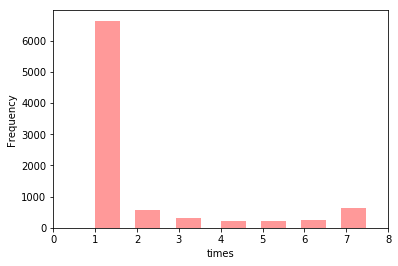

In [13]:
sns.distplot(times_visit.times,hist_kws={'width':0.6},kde=False,color='r')
plt.xlim([0,8])
plt.ylabel('Frequency')
plt.show()

**Defining an "adopted user"** as a user who has logged into the product on three separate days in at least one seven-day period , identify which factors predict future user adoption .

In [14]:
# id of adoprted users
adopted_user_id = [user for user in max_visit if max_visit[user]>=3]
adopted_user_id[:10]

[2, 10, 20, 33, 42, 43, 50, 53, 63, 69]

In [15]:
print('Number of adopted users: ')
len(adopted_user_id)

Number of adopted users: 


1602

**In total 8823 engagment users, there are 1602 adopted users.**

In [16]:
df['adopted_user'] = df['user_id'].apply(lambda x: 1 if x in adopted_user_id else 0)
df.head()

,time_stamp,user_id,visited,date,adopted_user
0,2014-04-22 03:53:30,1,1,2014-04-22,0
1,2013-11-15 03:45:04,2,1,2013-11-15,1
2,2013-11-29 03:45:04,2,1,2013-11-29,1
3,2013-12-09 03:45:04,2,1,2013-12-09,1
4,2013-12-25 03:45:04,2,1,2013-12-25,1


In [17]:
df_adopt = pd.DataFrame(df[df['adopted_user']==True].groupby('user_id')['date'].count())
df_adopt.columns = ['No_login']
df_adopt.head()

,No_login
user_id,
2,14
10,284
20,7
33,18
42,342


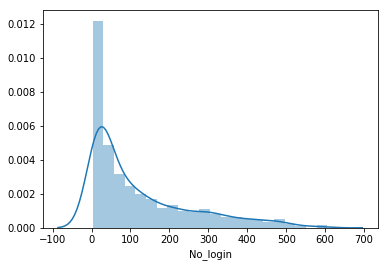

In [18]:
sns.distplot(df_adopt.No_login)

In [19]:
df_adopt.describe()

,No_login
count,1602.000000
mean,123.544320
std,133.926811
min,3.000000
25%,21.000000
50%,68.000000
75%,187.000000
max,606.000000


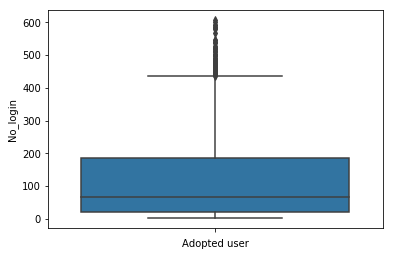

In [20]:
sns.boxplot(df_adopt.No_login,orient='v')
plt.xlabel('Adopted user')
plt.show()

For all adopted users, number of login times:
    - Minimum is 3 (obviously based on definition)
    - Mean is 123.5 
    - Max is 606
    

## Consider other effects on adopted users

In [21]:
user['adopted'] = user['object_id'].apply(lambda x: 1 if x in adopted_user_id else 0)
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


### a. Creation_source

In [22]:
user['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [23]:
user['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [24]:
creation_source = user.groupby(['creation_source', 'adopted'])['object_id'].count().unstack('adopted').rename(columns={0: 'No', 1:'Yes'})
creation_source

adopted,No,Yes
creation_source,,
GUEST_INVITE,1803,360
ORG_INVITE,3701,553
PERSONAL_PROJECTS,1947,164
SIGNUP,1794,293
SIGNUP_GOOGLE_AUTH,1153,232


In [25]:
creation_source['ratio']=creation_source['Yes']/creation_source['No']
creation_source['percent']=creation_source['Yes']/len(user)*100
creation_source

adopted,No,Yes,ratio,percent
creation_source,,,,
GUEST_INVITE,1803,360,0.199667,3.000000
ORG_INVITE,3701,553,0.149419,4.608333
PERSONAL_PROJECTS,1947,164,0.084232,1.366667
SIGNUP,1794,293,0.163322,2.441667
SIGNUP_GOOGLE_AUTH,1153,232,0.201214,1.933333


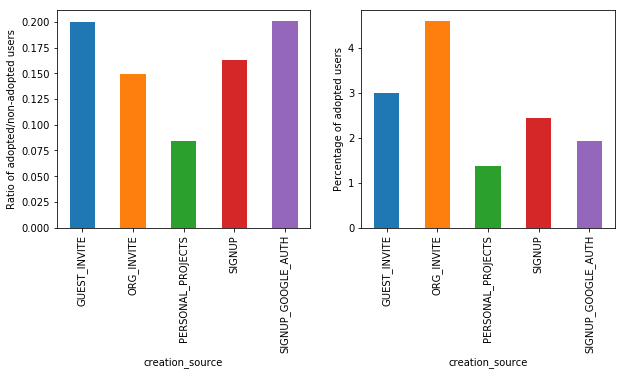

In [26]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
creation_source['ratio'].plot.bar()
plt.ylabel('Ratio of adopted/non-adopted users')

plt.subplot(122)
creation_source['percent'].plot.bar()
plt.ylabel('Percentage of adopted users')
plt.show()

For creation source factor:
    - Most of adopted users is from ORG_INVITE
    - Ratio of adopted/non-adopted user is higher from GUEST_INVITE and SIGNUP_GOOGLE_AUTH than other sources

### b. Creation year

In [27]:
user['created_year'] = user['creation_time'].map(lambda x: x[0:4])
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,created_year
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,2013
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,2013
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,2013


In [28]:
user['created_year'].unique()

array(['2014', '2013', '2012'], dtype=object)

In [29]:
user['created_year'].value_counts()

2013    5676
2014    3527
2012    2797
Name: created_year, dtype: int64

In [30]:
creation_year = user.groupby(['created_year', 'adopted']).count()['object_id'].unstack('adopted').rename(columns={0: 'No', 1:'Yes'})
creation_year['ratio'] = creation_year['Yes']/creation_year['No']
creation_year['percent'] = creation_year['Yes']/len(user)*100
creation_year

adopted,No,Yes,ratio,percent
created_year,,,,
2012,2342,455,0.194278,3.791667
2013,4823,853,0.176861,7.108333
2014,3233,294,0.090937,2.450000


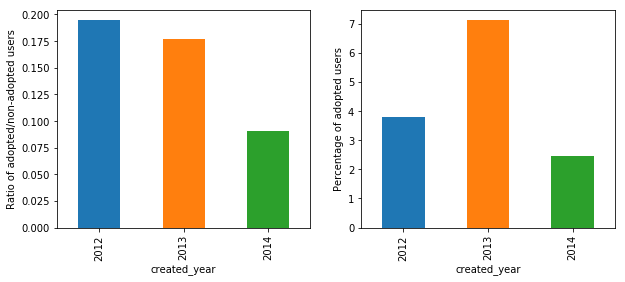

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
creation_year['ratio'].plot.bar()
plt.ylabel('Ratio of adopted/non-adopted users')

plt.subplot(122)
creation_year['percent'].plot.bar()
plt.ylabel('Percentage of adopted users')
plt.show()

Creation year:
    - Number of adopted users is highest in 2013
    - A ratio of adopted/non-adopted users is decreased from 2012 to 2014

### c. Creation month

In [32]:
user['created_month'] = user['creation_time'].map(lambda x: x[5:7])
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,created_year,created_month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014,04
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,2013,03
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,2013,05
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,2013,01


In [33]:
creation_month = user.groupby(['created_month', 'adopted']).count()['object_id'].unstack('adopted').rename(columns={0: 'No', 1:'Yes'})
creation_month['ratio'] = creation_month['Yes']/creation_month['No']
creation_month['percent'] = creation_month['Yes']/len(user)*100
creation_month

adopted,No,Yes,ratio,percent
created_month,,,,
01,884,145,0.164027,1.208333
02,800,134,0.167500,1.116667
03,1020,157,0.153922,1.308333
04,1063,106,0.099718,0.883333
05,1382,73,0.052822,0.608333
06,691,150,0.217077,1.250000
07,733,119,0.162347,0.991667
08,711,141,0.198312,1.175000
09,763,138,0.180865,1.150000


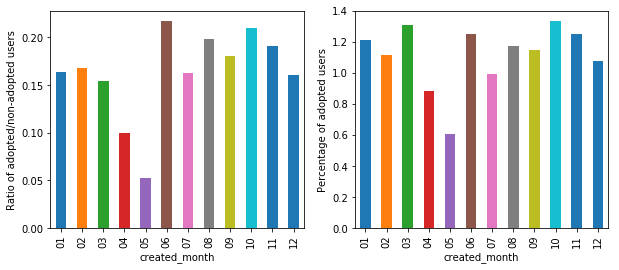

In [34]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
creation_month['ratio'].plot.bar()
plt.ylabel('Ratio of adopted/non-adopted users')

plt.subplot(122)
creation_month['percent'].plot.bar()
plt.ylabel('Percentage of adopted users')
plt.show()

- Number of adopted users is high in March, June and October while it is lowest in May
- Ratio of adopted/non-adopted users is also lowest in May and highest in June.

### d. Email registration

In [35]:
# Find domain of email 
def email_domain(email):
    at = email.find('@')
    dot = max([i for i, char in enumerate(email) if char == '.'])
    return email[at+1:dot]

In [36]:
user['domain'] = user['email'].apply(email_domain)
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,created_year,created_month,domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,2014,04,yahoo
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,2013,11,gustr
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,2013,03,gustr
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,2013,05,yahoo
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,2013,01,yahoo


In [37]:
# top 10 of email domain
user.domain.value_counts()[:10]

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
rerwl            2
oqpze            2
xvnbr            2
xybhi            2
Name: domain, dtype: int64

In [38]:
# percentage
user.domain.value_counts()[:10]/len(user)*100

gmail         29.683333
yahoo         20.391667
jourrapide    10.491667
cuvox         10.016667
gustr          9.825000
hotmail        9.708333
rerwl          0.016667
oqpze          0.016667
xvnbr          0.016667
xybhi          0.016667
Name: domain, dtype: float64

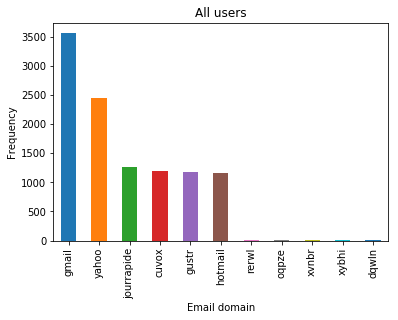

In [39]:
user.domain.value_counts()[:11].plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Email domain')
plt.title('All users')
plt.show()

In [40]:
# for adopted user
user.domain[user.adopted==True].value_counts()[:10]

gmail         543
yahoo         261
hotmail       197
jourrapide    163
gustr         143
cuvox         138
xgmsd           1
rtshi           1
bawmq           1
sqclx           1
Name: domain, dtype: int64

In [41]:
user.domain[user.adopted==True].value_counts()[:10]/len(user)*100

gmail         4.525000
yahoo         2.175000
hotmail       1.641667
jourrapide    1.358333
gustr         1.191667
cuvox         1.150000
xgmsd         0.008333
rtshi         0.008333
bawmq         0.008333
sqclx         0.008333
Name: domain, dtype: float64

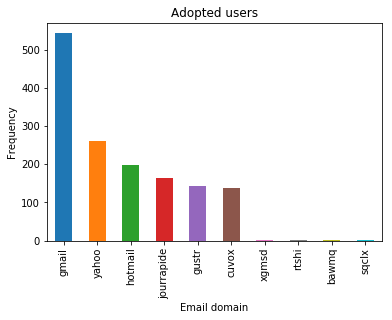

In [42]:
user.domain[user.adopted==True].value_counts()[:10].plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Email domain')
plt.title('Adopted users')
plt.show()

**Most of users was registered by gmail and yahoo. This trend is the same for adopted users**

### e. Opted in to mailing list

In [43]:
opted_in_to_mailing_list = user.groupby(['opted_in_to_mailing_list', 'adopted']).count()['object_id'].unstack('adopted').rename(columns={0: 'No', 1:'Yes'})
opted_in_to_mailing_list['ratio'] = opted_in_to_mailing_list['Yes']/opted_in_to_mailing_list['No']
opted_in_to_mailing_list['percent'] = opted_in_to_mailing_list['Yes']/len(user)*100
opted_in_to_mailing_list

adopted,No,Yes,ratio,percent
opted_in_to_mailing_list,,,,
0,7818,1188,0.151957,9.90
1,2580,414,0.160465,3.45


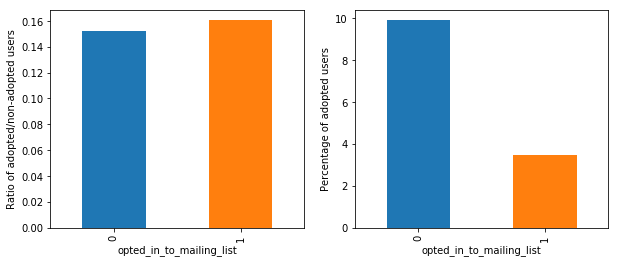

In [44]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
opted_in_to_mailing_list['ratio'].plot.bar()
plt.ylabel('Ratio of adopted/non-adopted users')

plt.subplot(122)
opted_in_to_mailing_list['percent'].plot.bar()
plt.ylabel('Percentage of adopted users')
plt.show()

For opted_in_to_mailing_list effect:
- Ratio of adopted/non-adopted users, there is no significant difference.
- Most of adopted users prefer not to opt into mailing list

### f. Enable for marketing

In [45]:
enabled_for_marketing_drip = user.groupby(['enabled_for_marketing_drip', 'adopted']).count()['object_id'].unstack('adopted').rename(columns={0: 'No', 1:'Yes'})
enabled_for_marketing_drip['ratio'] = enabled_for_marketing_drip['Yes']/enabled_for_marketing_drip['No']
enabled_for_marketing_drip['percent'] = enabled_for_marketing_drip['Yes']/len(user)*100
enabled_for_marketing_drip

adopted,No,Yes,ratio,percent
enabled_for_marketing_drip,,,,
0,8852,1356,0.153186,11.30
1,1546,246,0.159120,2.05


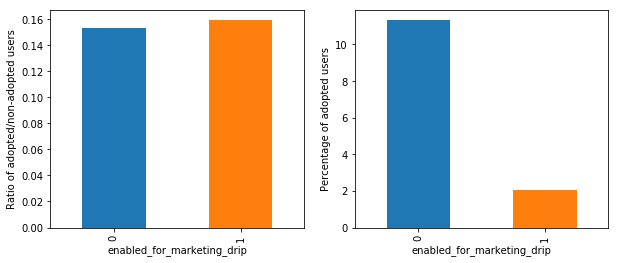

In [46]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
enabled_for_marketing_drip['ratio'].plot.bar()
plt.ylabel('Ratio of adopted/non-adopted users')

plt.subplot(122)
enabled_for_marketing_drip['percent'].plot.bar()
plt.ylabel('Percentage of adopted users')
plt.show()

For enabled_for_marketing_drip effect:
- Ratio of adopted/non-adopted users, there is no significant difference.
- Most of adopted users prefer not to be enable for marketing email drip

### g. Group of users

In [47]:
user.org_id.describe()

count    12000.000000
mean       141.884583
std        124.056723
min          0.000000
25%         29.000000
50%        108.000000
75%        238.250000
max        416.000000
Name: org_id, dtype: float64

In [48]:
user.org_id.unique().shape

(417,)

In [49]:
# top ten of organizations have the higest users
user.org_id.value_counts()[:10]

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [50]:
# top ten of organizations have the higest adopted users
user.org_id[user.adopted==True].value_counts()[:10]

4     16
7     16
2     15
9     14
1     14
3     14
13    14
62    12
5     12
0     11
Name: org_id, dtype: int64

- Every user is always belong to a specific organization. 
- Totally, there are 417 user groups.
- I think this factor does not clearly indicate the considerable effect on users

### h. invited_by_user_id

In [51]:
# number of users were invited
user.invited_by_user_id.count()

6417

In [52]:
# number of adopted users were invited
user.invited_by_user_id[user.adopted==True].count()

913

- Around 53.5% of users were invited to join.
- Around 7.6% users were invited will become adopted users. It means that there is a low percentage of invited users who will become a adopted users.